<a href="https://colab.research.google.com/github/hlberghout/CHEM4420/blob/main/10_92_PiB_Wavefunction_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identify the nodes in PiB wavefunctions**

10.92 - Construct plots of the probablilities of the first three wavefunctions for a particle in a one-dimensional box having length a. Identify where the nodes are.
---



This is a text block than can be used to explain sections of code in the program or even write a complete report.  Comments within the code block can also be used as demonstrated below.  The first code block of this notebook is a library declaration block defining the libraries the contain the functions that we will use and the notebook scrip that follows and how those functions are called.

In [ ]:
#note that any input following a pound symbol is a comment and is ignored by the intepreter.
import matplotlib #Matplotlib is a python plotting library used in this example.
import matplotlib.pyplot as plt #pyplot provides a matlab like plotting function.
import numpy as np #NumPy is the fundamental scientific computing package in Python.
import scipy.constants as constants #SciPy physical constants library, SI units.
import scipy.integrate as integrate #SciPy Integration library
import scipy.optimize as optimize
import scipy.special as special #SciPy special functions library
import seaborn #matplotlib enhancement.
from IPython.display import Latex #library to allow creation of pretty formulas written in LATEX

This block defines the initial values of variable that are not defined elsewhere in the imported libraries above.

In [ ]:
# Defined variables
T = 6000.0 #Absolute temperature (Kelvin)
dl = 1.0E-9 #dlambda - wavelength step size (meters)
lmax = 3.0E-6 #Maximum wavelength value to plot on x axis (meters)
l = np.arange(dl, lmax, dl) #lambda - wavelength range variable for plot
rmax = 1.5E6 #maximum Energy Density value to plot 

The following three blocks define the three functions that we will be plotting and comparing in this activity.  Each of these functions expresses the energy density in the infinitesimal energy density $\text{d} \mathcal{E}$ in the wavelength range $\lambda$ to $\lambda + \text{d} \lambda$ as:

$$\text{d} \mathcal{E} = \rho \text{d} \lambda $$

The function $\rho$ corresponding to the **Rayleigh-Jeans law** is
$$\rho \left(\lambda, T\right) = \left( \frac {8 \pi k T}{\lambda^4} \right) $$
The other symbols retain their usual definitions.

In [ ]:
#All formulas defined as spectral radiances
#Define Rayleigh-Jeans law as a function
def r_RJ(l, T):
 return 8*constants.pi*constants.k*T/l**4

The function $\rho$ corresponding to the **Wien's approximation** is:

$$\rho \left(\lambda, T\right) = \frac{8 \pi h c}{\lambda^5} \operatorname e ^{hc/\lambda k T}$$ 

Note that this form of the function is that presented by Planck and includes Planck's constant that was not part of Wien's original expersion.  This form is used to match the scale for comparison purposes of Planck's equation below.

In [ ]:
#Define Wien exponential law (as modified by Planck-See Wikipedia "Wien approximation") as a function
def r_W(l, T):
 return 8*constants.pi*constants.h*constants.c/l**5*np.exp(-constants.h*constants.c/(l*constants.k*T))

The function $\rho$ corresponding to the **Planck's law** is:

$$\rho \left( \lambda , T \right) = \frac{8 \pi h c}{\lambda^5} \left( \frac{1}{\operatorname e ^{hc/\lambda k T} - 1} \right)$$

In [ ]:
#Define Planck's equation as a function
def r_P(l, T):
 return 8*constants.pi*constants.h*constants.c/l**5*(1/(np.exp(constants.h*constants.c/(l*constants.k*T))-1))

Finally, this block of code produces the plot that allows us to visually compare these three functions.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


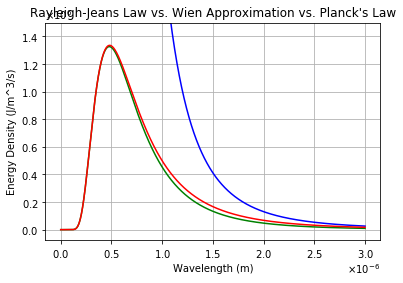

In [ ]:
#Plot equations at temperature T.
fig = plt.figure()
ax = plt.axes()
ax.plot(l,r_RJ(l, T), 'b')
ax.plot(l,r_W(l, T), 'g')
ax.plot(l,r_P(l, T), 'r')
ax.set(xlabel='Wavelength (m)', ylabel='Energy Density (J/m^3/s)',
       title="Rayleigh-Jeans Law vs. Wien Approximation vs. Planck's Law")
ax.grid()
plt.ylim(-rmax*0.05,rmax)
plt.ticklabel_format(style='sci', axis='both',scilimits=(-3,4), useMathText='True')
plt.show()